### Task 4.10 - Part 1 continued_5

##### Table of Contents
Continuing visualizations

7.	Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

8.	Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Jay\Documents\Instacart Basket Analysis'

In [3]:
# import prepared data
df = pd.read_pickle(os.path.join(path, '02 Data Sets', 'Prepared Data', 'df_4.pkl'))

In [4]:
df.shape

(30964570, 39)

In [5]:
df.head()

,department_id,department,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,...,dependants,family_status,income,region,exclusion_flag,age_group,income_range,parental_status,weekday,day_section
0,1,frozen,738281,2,4,2,10,8.0,False,45613,...,3,married,64940,West,Frequent Customer,60-69,050000-69999,Parent,Monday,Mid-day
1,1,frozen,738281,2,4,2,10,8.0,False,9681,...,3,married,64940,West,Frequent Customer,60-69,050000-69999,Parent,Monday,Mid-day
2,1,frozen,738281,2,4,2,10,8.0,False,21150,...,3,married,64940,West,Frequent Customer,60-69,050000-69999,Parent,Monday,Mid-day
3,1,frozen,1199898,2,6,2,9,13.0,False,9681,...,3,married,64940,West,Frequent Customer,60-69,050000-69999,Parent,Monday,Morning
4,1,frozen,788338,2,8,1,15,27.0,False,2002,...,3,married,64940,West,Frequent Customer,60-69,050000-69999,Parent,Sunday,Afternoon


In [6]:
df.dtypes

department_id                int64
department                category
order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
new_customer                  bool
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name              category
aisle_id                   float64
prices                     float64
_merge                    category
price_range_loc           category
Busiest day               category
Busiest_days              category
busiest_period_of_day     category
max_order                    int64
loyalty_flag              category
spending                   float64
spending_flag             category
frequency                  float64
gender                    category
state                     category
age                          int64
date_joined         

###### Continuing visualizations

In [28]:
# crosstab of weekday & income_range variables
xtab_day_income = pd.crosstab(df['weekday'], df['income_range'], dropna = False)

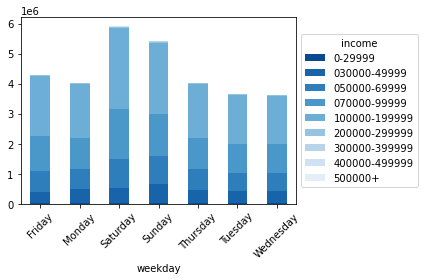

In [29]:
bar_day_income = xtab_day_income.plot.bar(stacked = True, color = sns.color_palette('Blues_r', 9))
plt.legend(title = 'income',loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()

In [30]:
xtab_busypod_age = pd.crosstab(df['day_section'], df['age_group'], dropna = False)

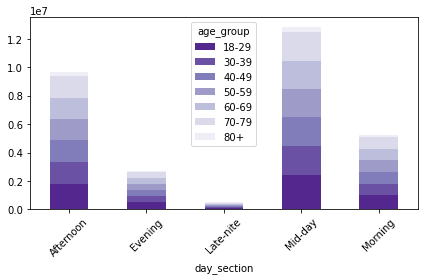

In [31]:
bar_busypod_age = xtab_busypod_age.plot.bar(stacked = True, color = sns.color_palette('Purples_r', 7))
plt.legend(title = 'age_group',loc='upper center')
plt.xticks(rotation=45)
plt.tight_layout()

In [33]:
# export "bar_day_income" Bar Chart
bar_day_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_day_income.png'))

In [34]:
# export "bar_busypod_age" Bar Chart
bar_busypod_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_busypod_age.png'))

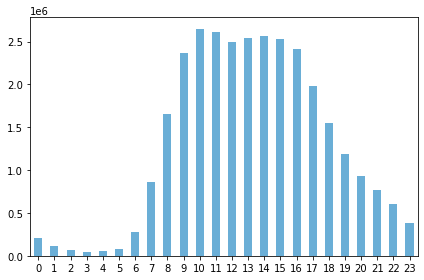

In [51]:
# Busiest hours of the day
bar_busy_hour = df['order_hour_of_day'].value_counts().sort_index().plot.bar(color = sns.color_palette('Blues', 1))
plt.xticks(rotation=0, horizontalalignment="center")
plt.tight_layout()

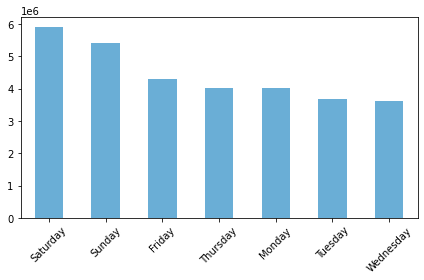

In [57]:
# Busiest day of the week
bar_busy_dow = df['weekday'].value_counts().plot.bar(color = sns.color_palette('Blues', 1))
plt.xticks(rotation=45, horizontalalignment="center")
plt.tight_layout()

In [58]:
# export "bar_busy_dow" Bar Chart
bar_busy_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_busy_dow.png'))

In [59]:
# export "bar_busy_hour" Bar Chart
bar_busy_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_busy_hour.png'))

In [62]:
# Mean price per weekday
price_weekday = df.groupby('weekday').agg({'prices': ['mean']})

Text(0, 0.5, 'mean_price')

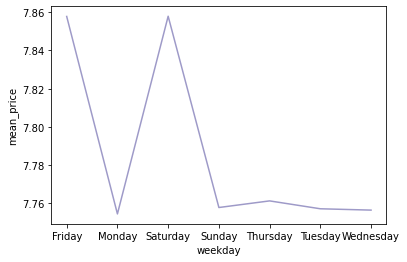

In [63]:
# Create a line chart of mean prices per weekday
line_price_weekday = price_weekday.plot.line(legend = False, color = sns.color_palette('Purples', 1))
plt.ylabel('mean_price')

In [66]:
# Crosstab for department and day_section
dept_pod = pd.crosstab(df['department'], df['day_section'], dropna = False)

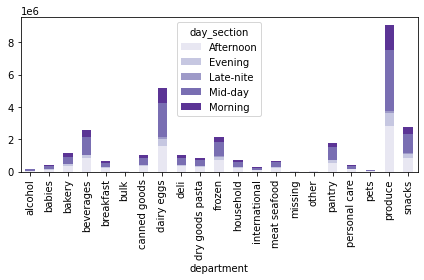

In [78]:
bar_dept_pod = dept_pod.plot.bar(stacked = True, color = sns.color_palette('Purples', 5))
plt.legend(title = 'day_section',loc='upper center')
plt.tight_layout()

In [72]:
# export "line_price_weekday" Line Chart
line_price_weekday.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_weekday.png'))

In [73]:
# export "bar_dept_pod" Bar Chart
bar_dept_pod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_pod.png'))

In [74]:
# Crosstab for department and weekday
dept_dow = pd.crosstab(df['department'], df['weekday'], dropna = False)

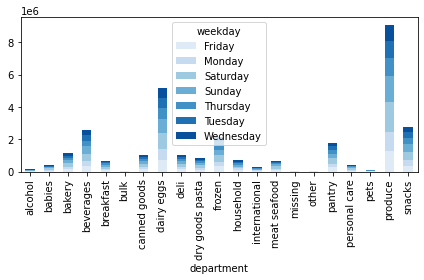

In [80]:
bar_dept_dow = dept_dow.plot.bar(stacked = True, color  = sns.color_palette('Blues', 7))
plt.legend(title = 'weekday',loc='upper center')
plt.tight_layout()

In [81]:
# export "bar_dept_dow" Bar Chart
bar_dept_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_dow.png'))

In [82]:
# Crosstab for weekday and parental_status
dow_parent = pd.crosstab(df['weekday'], df['parental_status'], dropna = False)

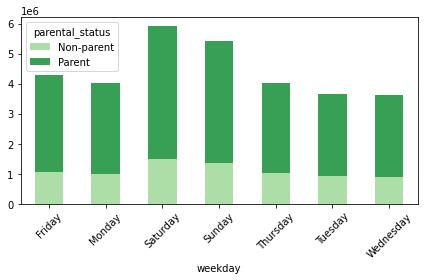

In [84]:
bar_dow_parent = dow_parent.plot.bar(stacked = True, color = sns.color_palette('Greens', 2))
plt.legend(title = 'parental_status',loc='upper left')
plt.xticks(rotation=45, horizontalalignment="center")
plt.tight_layout()

In [85]:
# export "bar_dow_parent" Bar Chart
bar_dow_parent.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dow_parent.png'))

7.	Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [86]:
# aggregating age + prices
agg_age_price = df.groupby('age').agg({'prices' : ['min', 'mean', 'max']})

In [87]:
agg_age_price

prices                
       min      mean   max
age                       
18     1.0  7.805299  25.0
19     1.0  7.807545  25.0
20     1.0  7.771265  25.0
21     1.0  7.780373  25.0
22     1.0  7.785209  25.0
..     ...       ...   ...
77     1.0  7.758583  25.0
78     1.0  7.811525  25.0
79     1.0  7.776831  25.0
80     1.0  7.802853  25.0
81     1.0  7.803464  25.0

[64 rows x 3 columns]

In [89]:
# aggregating age + order number
agg_age_order_number = df.groupby('age').agg({'order_number' : ['min', 'mean', 'max']})

In [90]:
agg_age_order_number

order_number               
             min       mean max
age                            
18             1  17.722075  99
19             1  17.996109  99
20             1  17.335798  99
21             1  18.504328  99
22             1  18.696633  99
..           ...        ...  ..
77             1  17.721439  99
78             1  17.375198  99
79             1  17.848475  99
80             1  18.088988  99
81             1  18.017180  99

[64 rows x 3 columns]

In [91]:
# aggregating income range + prices
agg_income_range_price = df.groupby('income_range').agg({'prices' : ['min', 'mean', 'max']})

In [92]:
agg_income_range_price

prices                
                 min      mean   max
income_range                        
0-29999          1.0  6.532603  25.0
030000-49999     1.0  6.718039  25.0
050000-69999     1.0  7.782540  25.0
070000-99999     1.0  7.957059  25.0
100000-199999    1.0  7.956613  25.0
200000-299999    1.0  7.791666  25.0
300000-399999    1.0  7.770836  25.0
400000-499999    1.0  7.745431  25.0
500000+          1.0  7.727170  25.0

In [93]:
# aggregating income range + prices
agg_income_range_order_number = df.groupby('income_range').agg({'order_number' : ['min', 'mean', 'max']})

In [94]:
agg_income_range_order_number

order_number               
                       min       mean max
income_range                             
0-29999                  1  16.028153  99
030000-49999             1  16.884912  99
050000-69999             1  18.001570  99
070000-99999             1  17.990810  99
100000-199999            1  17.880489  99
200000-299999            1  19.864184  99
300000-399999            1  21.183716  99
400000-499999            1  18.977656  99
500000+                  1  19.652892  99

In [95]:
# aggregating family_status + prices
agg_fam_status_price = df.groupby('family_status').agg({'prices' : ['min', 'mean', 'max']})

In [96]:
agg_fam_status_price

prices                
                                    min      mean   max
family_status                                          
divorced/widowed                    1.0  7.801016  25.0
living with parents and siblings    1.0  7.800604  25.0
married                             1.0  7.790278  25.0
single                              1.0  7.783597  25.0

In [97]:
# aggregating family_status + order_number
agg_fam_status_order_number = df.groupby('family_status').agg({'order_number' : ['min', 'mean', 'max']})

In [98]:
agg_fam_status_order_number

order_number               
                                          min       mean max
family_status                                               
divorced/widowed                            1  17.993355  99
living with parents and siblings            1  18.000712  99
married                                     1  17.778731  99
single                                      1  17.939521  99

In [99]:
# aggregating dependants + prices
agg_number_of_dependants_price = df.groupby('dependants').agg({'prices' : ['min', 'mean', 'max']})

In [100]:
agg_number_of_dependants_price

prices                
              min      mean   max
dependants                       
0             1.0  7.789550  25.0
1             1.0  7.795910  25.0
2             1.0  7.784014  25.0
3             1.0  7.792886  25.0

In [101]:
# aggregating dependants + order_number
agg_number_of_dependants_order_number = df.groupby('dependants').agg({'order_number' : ['min', 'mean', 'max']})

In [102]:
agg_number_of_dependants_order_number

order_number               
                    min       mean max
dependants                            
0                     1  17.957920  99
1                     1  17.793269  99
2                     1  17.747767  99
3                     1  17.837402  99

In [103]:
# aggregating parental_status + prices
agg_parental_status_price = df.groupby('parental_status').agg({'prices' : ['min', 'mean', 'max']})

In [104]:
agg_parental_status_price

prices                
                   min      mean   max
parental_status                       
Non-parent         1.0  7.789550  25.0
Parent             1.0  7.790937  25.0

In [105]:
# aggregating parental_status+ order_number
agg_parental_status_order_number = df.groupby('parental_status').agg({'order_number' : ['min', 'mean', 'max']})

In [106]:
agg_parental_status_order_number

order_number               
                         min       mean max
parental_status                            
Non-parent                 1  17.957920  99
Parent                     1  17.792888  99

8.	Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

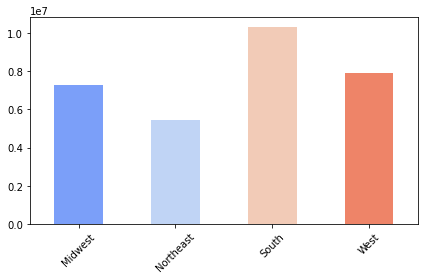

In [108]:
region_bar = df['region'].value_counts().sort_index().plot.bar(color = sns.color_palette('coolwarm', 4))
plt.xticks(rotation= 45, horizontalalignment="center")
plt.tight_layout()

In [109]:
# export "region_bar" Bar Chart
region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_bar.png'))

In [110]:
# Crosstab for region and parental_status
region_parent = pd.crosstab(df['region'], df['parental_status'], dropna = False)

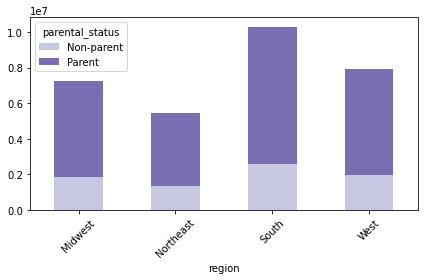

In [111]:
bar_region_parent = region_parent.plot.bar(stacked = True, color = sns.color_palette('Purples', 2))
plt.legend(title = 'parental_status',loc='upper left')
plt.xticks(rotation=45, horizontalalignment="center")
plt.tight_layout()

In [112]:
# Crosstab for region and income_range
region_income = pd.crosstab(df['region'], df['income_range'], dropna = False)

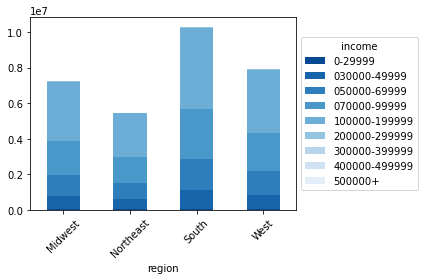

In [116]:
bar_region_income = region_income.plot.bar(stacked = True, color = sns.color_palette('Blues_r', 9))
plt.legend(title = 'income',loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()

In [117]:
# Crosstab for region and age_group
region_age = pd.crosstab(df['region'], df['age_group'], dropna = False)

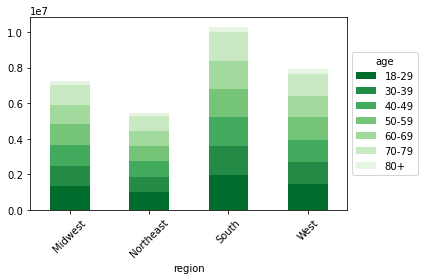

In [118]:
bar_region_age = region_age.plot.bar(stacked = True, color = sns.color_palette('Greens_r', 7))
plt.legend(title = 'age',loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()

In [119]:
# export "bar_region_parent" Bar Chart
bar_region_parent.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_parent.png'))

In [120]:
# export "bar_region_income" Bar Chart
bar_region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_income.png'))

In [121]:
# export "bar_region_age" Bar Chart
bar_region_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_age.png'))

In [122]:
# Export data to pkl
df.to_pickle(os.path.join(path, '02 Data Sets','Prepared Data', 'df_5.pkl'))